In [1]:
import os
import sys
sys.path.append('..')

from scripts.ab_test.metrics import *
from scripts.utils.eda_utils import *
from scripts.ab_test.ab_testing import *
from scripts.utils.visualizations import *
from scripts.data_utils.loaders import *
from scripts.data_utils.cleaning import *
from scripts.data_utils.processing import *

%load_ext autoreload
%autoreload 2

In [2]:
file_path = r"../data/AlphaCare_Risk_Insurance_data.csv"
cleaned_df = load_data(file_path)
cleaned_df.shape

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\data_utils\loaders.py:8: DtypeWarning: Columns (4,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path, sep=sep)


Data loaded successfully.


(1000098, 52)

In [3]:
# Add Risk and Profit Margin columns in the datafram
processed_df = compute_risk_metrics(cleaned_df)
df = processed_df
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin,Risk
0,145249,12827,2015-03-01,True,NaN,CloseCorporation,Mr,English,FirstNationalBank,Currentaccount,...,Windscreen,Comprehensive-Taxi,MotorComprehensive,MobilityMeteredTaxis:Monthly,Commercial,IFRSConstant,21.929825,0.0,21.929825,0.0
1,145249,12827,2015-05-01,True,NaN,CloseCorporation,Mr,English,FirstNationalBank,Currentaccount,...,Windscreen,Comprehensive-Taxi,MotorComprehensive,MobilityMeteredTaxis:Monthly,Commercial,IFRSConstant,21.929825,0.0,21.929825,0.0
3,145255,12827,2015-05-01,True,NaN,CloseCorporation,Mr,English,FirstNationalBank,Currentaccount,...,OwnDamage,Comprehensive-Taxi,MotorComprehensive,MobilityMeteredTaxis:Monthly,Commercial,IFRSConstant,512.848070,0.0,512.848070,0.0
5,145247,12827,2015-01-01,True,NaN,CloseCorporation,Mr,English,FirstNationalBank,Currentaccount,...,ThirdParty,Comprehensive-Taxi,MotorComprehensive,MobilityMeteredTaxis:Monthly,Commercial,IFRSConstant,3.256435,0.0,3.256435,0.0
6,145247,12827,2015-04-01,True,NaN,CloseCorporation,Mr,English,FirstNationalBank,Currentaccount,...,ThirdParty,Comprehensive-Taxi,MotorComprehensive,MobilityMeteredTaxis:Monthly,Commercial,IFRSConstant,50.474737,0.0,50.474737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSABank,Savingsaccount,...,ThirdParty,Comprehensive-Taxi,MotorComprehensive,MobilityCommercialCover:Monthly,Commercial,IFRSConstant,347.235175,0.0,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSABank,Savingsaccount,...,ThirdParty,Comprehensive-Taxi,MotorComprehensive,MobilityCommercialCover:Monthly,Commercial,IFRSConstant,347.235175,0.0,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSABank,Savingsaccount,...,ThirdParty,Comprehensive-Taxi,MotorComprehensive,MobilityCommercialCover:Monthly,Commercial,IFRSConstant,347.235175,0.0,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSABank,Savingsaccount,...,PassengerLiability,Comprehensive-Taxi,MotorComprehensive,MobilityCommercialCover:Monthly,Commercial,IFRSConstant,2.315000,0.0,2.315000,0.0


In [4]:
# dvc add data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv
# git commit -am "Update dataset with new features"
# dvc push
# dvc diff

output_path = r'../data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv'
save_data(processed_df, output_path)

In [5]:
avg_claims_by_province = {province: compute_average_risk(df, "Province", province) for province in df["Province"].unique()}
avg_claims_by_province

{'Gauteng': 0.42888927480749073,
 'KwaZulu-Natal': 0.26474645146103315,
 'Mpumalanga': 0.3926976895015563,
 'EasternCape': 0.23558851652254742,
 'WesternCape': 0.3417503129575668,
 'Limpopo': 0.3487120371329607,
 'NorthWest': 0.28534843459632137,
 'FreeState': 0.10620929937799883,
 'NorthernCape': 0.20383085693985306}

In [6]:
avg_margin_by_gender = {gender: compute_margin(df, "Gender", gender) for gender in df["Gender"].unique()}
avg_margin_by_gender

{'Notspecified': -0.9331944760078408,
 'Male': 17.45117170935069,
 'Female': 16.804688523031988}

1. Testing Risk Differences Across Provinces
- Null Hypothesis: There are no risk differences across provinces
- Alternative Hypothesis: There are significant differences in risk (claims)

In [7]:
df['Province'].unique()

array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'EasternCape',
       'WesternCape', 'Limpopo', 'NorthWest', 'FreeState', 'NorthernCape'],
      dtype=object)

In [8]:
# A/B Testing: Risk Differences between Provinces Comparison
province_group_a, province_group_b = segment_data(df, "Province", ["Gauteng"], ["WesternCape"])
perform_t_test(province_group_a, province_group_b, "Risk")

{'stat': 1.8889477538892752,
 'p_value': 0.05890075652170662,
 'significant': False}

In [9]:
# Extract risk groups based on Province and perform ANOVA test across groups
province_groups = [group["Risk"].values for _, group in df.groupby("Province")]

# Risk Across Provinces with ANOVA
perform_anova_test(*province_groups)

{'stat': 4.988778295471582,
 'p_value': 3.3310233679703755e-06,
 'significant': True}

2. Testing Risk Differences Between Zip Codes
- Null Hypothesis: Risk (claims) is independent of zip codes
- Alternative Hypothesis: There are differences in risk across zip codes

In [10]:
# A/B Testing: Risk Differences for Zip/Postal Codes (Categorical comparison)
contingency_table = generate_contingency_table(df, "PostalCode", "Risk", 0.5)
perform_chi2_test(contingency_table)

{'stat': 1152.8326065972738,
 'p_value': 4.8003518557879056e-11,
 'significant': True}

In [11]:
# A/B Testing: Risk Differences for prominent Zip/Postal Codes (Categorical comparison)
filtered_df = df[df["PostalCode"].isin(df["PostalCode"].value_counts().index[:10])]
contingency_table = generate_contingency_table(filtered_df, "PostalCode", "Risk", 0.5)
perform_chi2_test(contingency_table)

{'stat': 48.2725980220106,
 'p_value': 2.2712616375971555e-07,
 'significant': True}

3. Testing Margin Differences Between Zip Codes
- Null Hypothesis: Margins do not vary between zip codes
- Alternative Hypothesis: There are significant margin differences

In [12]:
df['PostalCode'].value_counts()[:3], df['PostalCode'].value_counts()[-3:]

(PostalCode
 2000    90944
 122     27898
 299     16731
 Name: count, dtype: int64,
 PostalCode
 7340    1
 7456    1
 6655    1
 Name: count, dtype: int64)

In [13]:
# A/B Testing: t-test for Margin Differences between Postal/Zip Codes
zipcode_group_a, zipcode_group_b = segment_data(df, "PostalCode", [2000], [122])
perform_t_test(zipcode_group_a, zipcode_group_b, "ProfitMargin")

{'stat': 0.6421862817465027,
 'p_value': 0.5207561363156676,
 'significant': False}

In [14]:
# Extract profit margin groups based on PostalCode
postal_code_groups = [group["ProfitMargin"].values for _, group in df.groupby("PostalCode")]

# Perform ANOVA test for Margin Across Zip Codes
perform_anova_test(*postal_code_groups)

{'stat': 0.8397459167039115,
 'p_value': 0.9997627033248128,
 'significant': False}

4. Testing Risk Differences Between Genders
- Null Hypothesis: There are no differences in risk between males and females
- Alternative Hypothesis: There are significant differences in risk between genders

In [15]:
# A/B Testing: Mann-Whitney U Test for Gender Comparison
gender_group_a, gender_group_b = segment_data(df, "Gender", ["Male"], ["Female"])
perform_mannwhitneyu_test(gender_group_a, gender_group_b, "Risk")

{'stat': 32908460.0, 'p_value': 0.6350800943780405, 'significant': False}

In [16]:
# Risk Differences (Gender)
perform_t_test(gender_group_a, gender_group_b, "Risk")

# Interpretation: A high p-value (0.5495) indicates that there is no statistically significant difference 
# in risk between men and women based on Risk. This means we fail to reject the null hypothesis.


{'stat': -0.5985543131195025,
 'p_value': 0.549506376964734,
 'significant': False}

In [17]:
# Margin Differences (Gender)
perform_t_test(gender_group_a, gender_group_b, "Risk")

{'stat': -0.5985543131195025,
 'p_value': 0.549506376964734,
 'significant': False}

In [18]:
perform_mannwhitneyu_test(gender_group_a, gender_group_b, "Risk")


{'stat': 32908460.0, 'p_value': 0.6350800943780405, 'significant': False}

In [19]:
# Extract risk groups based on Gender and perform ANOVA test across groups
gender_groups = [group["Risk"].values for _, group in df.groupby("Gender")]

# Risk Across Genders with ANOVA
perform_anova_test(*gender_groups)

{'stat': 0.40069494981878484,
 'p_value': 0.6698545427806128,
 'significant': False}

In [20]:
# Extract profit margin groups based on Gender
gender_groups = [group["ProfitMargin"].values for _, group in df.groupby("Gender")]

# Perform ANOVA test for Margin Across Genders
perform_anova_test(*gender_groups)

{'stat': 0.4156491020359553,
 'p_value': 0.6599119757366624,
 'significant': False}

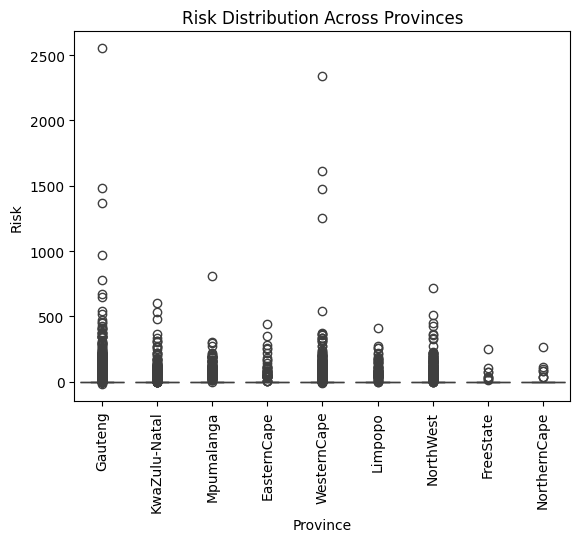

In [21]:
plot_boxplot(data=df, x_column="Province", y_column="Risk", title="Risk Distribution Across Provinces")

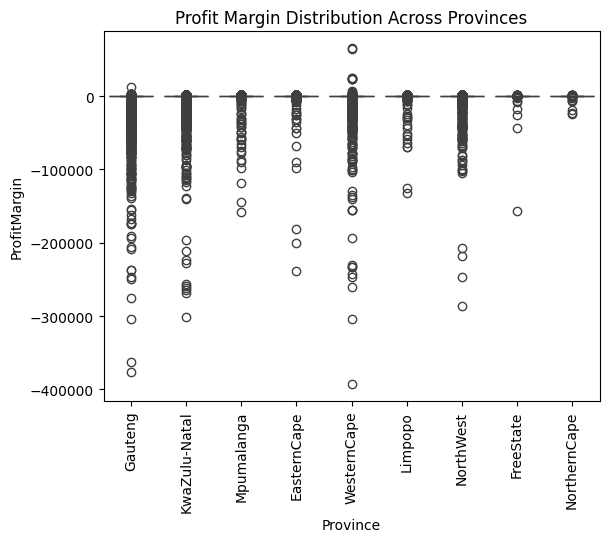

In [22]:
plot_boxplot(data=df, x_column="Province", y_column="ProfitMargin", title="Profit Margin Distribution Across Provinces")

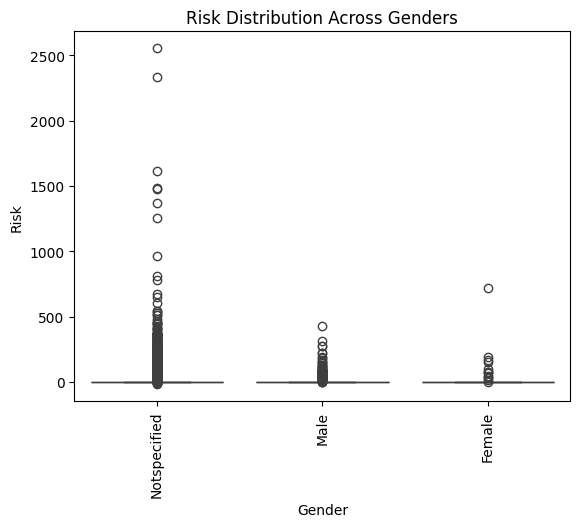

In [23]:
plot_boxplot(data=df, x_column="Gender", y_column="Risk", title="Risk Distribution Across Genders")